
MODEL: Decision Tree
Accuracy: 0.7409510290986515
Sensitivity (Recall): 0.4919786096256685
Specificity: 0.8309178743961353
F1 Score: 0.5020463847203275

Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.83      0.82      1035
        True       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

AUC: 0.6609574000878348

MODEL: KNN
Accuracy: 0.7473385379701917
Sensitivity (Recall): 0.5
Specificity: 0.8367149758454107
F1 Score: 0.5123287671232877

Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.84      0.83      1035
        True       0.53      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75   

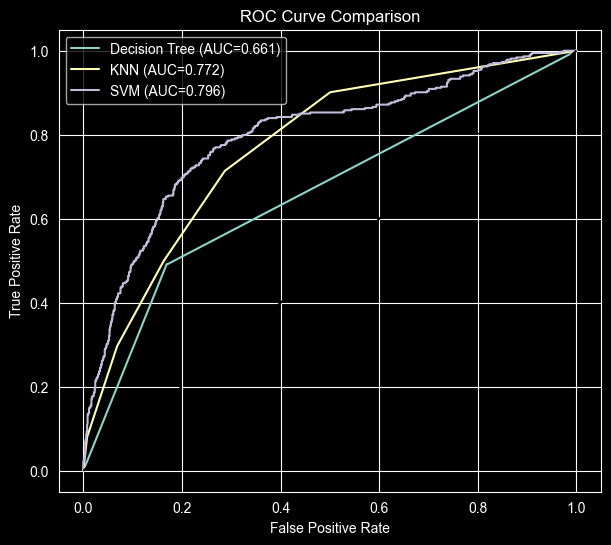



===== FINAL COMPARISON =====
Decision Tree -> 0.7409510290986515 0.4919786096256685 0.8309178743961353 0.5020463847203275 0.6609574000878348
KNN           -> 0.7473385379701917 0.5 0.8367149758454107 0.5123287671232877 0.7717972564519879
SVM           -> 0.7927608232789212 0.4893048128342246 0.9024154589371981 0.5562310030395137 0.7960500142085821


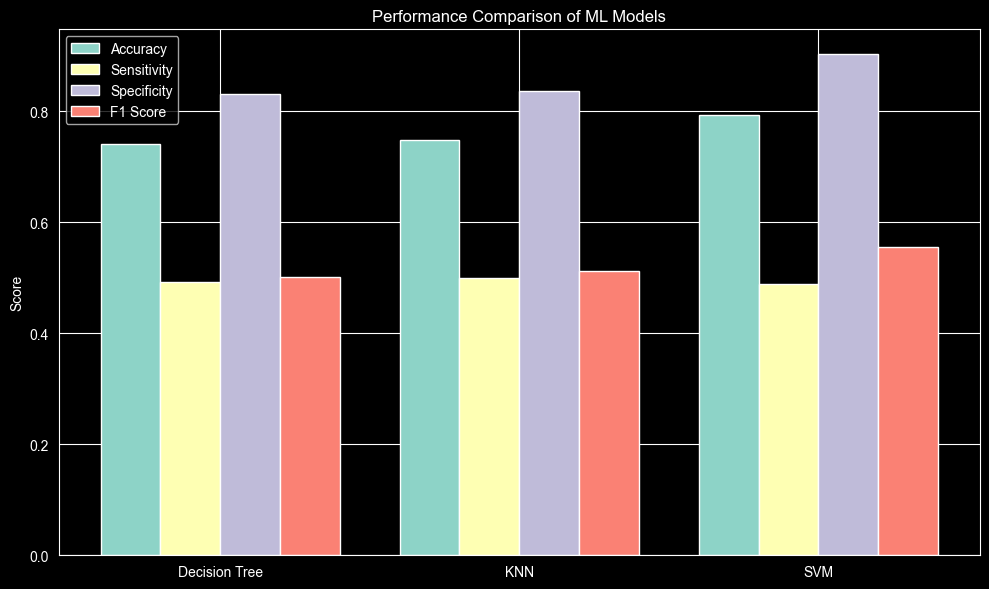

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve


df = pd.read_csv("telco_churn.csv")


df.drop("customerID", axis=1, inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


df = pd.get_dummies(df, drop_first=True)


X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True, random_state=42)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)


def evaluate_model(name, y_test, y_pred, model, X_test):

    print("\n=================================")
    print("MODEL:", name)


    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)


    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()


    sensitivity = tp / (tp + fn)


    specificity = tn / (tn + fp)


    f1 = f1_score(y_test, y_pred)

    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    print("F1 Score:", f1)

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print("AUC:", auc)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name + " (AUC=" + str(round(auc,3)) + ")")

    return acc, sensitivity, specificity, f1, auc


plt.figure(figsize=(7,6))

acc_dt, sen_dt, spe_dt, f1_dt, auc_dt = evaluate_model("Decision Tree", y_test, y_pred_dt, dt, X_test)
acc_knn, sen_knn, spe_knn, f1_knn, auc_knn = evaluate_model("KNN", y_test, y_pred_knn, knn, X_test)
acc_svm, sen_svm, spe_svm, f1_svm, auc_svm = evaluate_model("SVM", y_test, y_pred_svm, svm, X_test)

plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()


plt.savefig("roc_comparison.png", dpi=300)
plt.show()


print("\n\n===== FINAL COMPARISON =====")
print("Decision Tree ->", acc_dt, sen_dt, spe_dt, f1_dt, auc_dt)
print("KNN           ->", acc_knn, sen_knn, spe_knn, f1_knn, auc_knn)
print("SVM           ->", acc_svm, sen_svm, spe_svm, f1_svm, auc_svm)

import numpy as np



models = ["Decision Tree", "KNN", "SVM"]

accuracy = [acc_dt, acc_knn, acc_svm]
sensitivity = [sen_dt, sen_knn, sen_svm]
specificity = [spe_dt, spe_knn, spe_svm]
f1score = [f1_dt, f1_knn, f1_svm]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))

plt.bar(x - 1.5*width, accuracy, width, label="Accuracy")
plt.bar(x - 0.5*width, sensitivity, width, label="Sensitivity")
plt.bar(x + 0.5*width, specificity, width, label="Specificity")
plt.bar(x + 1.5*width, f1score, width, label="F1 Score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Performance Comparison of ML Models")
plt.legend()
plt.tight_layout()

plt.savefig("performance_comparison.png", dpi=300)
plt.show()